In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
d = {'Petal Length':df['PetalLengthCm'], 'Sepal Width':df['SepalWidthCm'], 'Species':df['Species']}
new_df = pd.DataFrame(data = d)
new_df

,Petal Length,Sepal Width,Species
0,1.4,3.5,Iris-setosa
1,1.4,3.0,Iris-setosa
2,1.3,3.2,Iris-setosa
3,1.5,3.1,Iris-setosa
4,1.4,3.6,Iris-setosa
...,...,...,...
145,5.2,3.0,Iris-virginica
146,5.0,2.5,Iris-virginica
147,5.2,3.0,Iris-virginica
148,5.4,3.4,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Species'] = le.fit_transform(new_df['Species'])
new_df

,Petal Length,Sepal Width,Species
0,1.4,3.5,0
1,1.4,3.0,0
2,1.3,3.2,0
3,1.5,3.1,0
4,1.4,3.6,0
...,...,...,...
145,5.2,3.0,2
146,5.0,2.5,2
147,5.2,3.0,2
148,5.4,3.4,2


In [5]:
X = new_df.drop('Species', axis = 1).to_numpy()
y = np.array(new_df['Species'])

### Multi Class Perceptron Model

C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_1628\3067502883.py:18: RuntimeWarning: invalid value encountered in add
  w[c] += update * xi
C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_1628\3067502883.py:19: RuntimeWarning: invalid value encountered in double_scalars
  b[c] += update


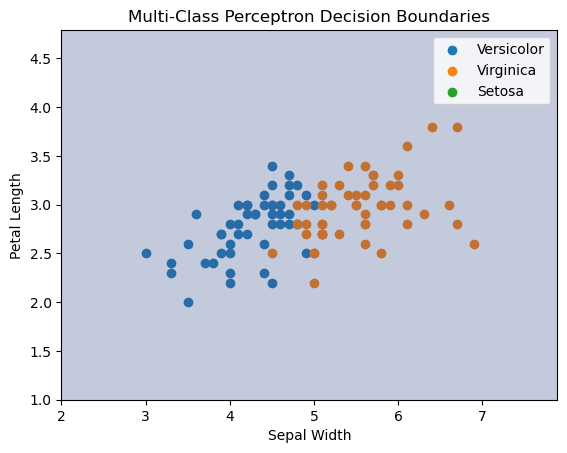

In [17]:
# Preprocess the data
X = X[y != 0]  # Exclude Setosa
y = y[y != 0]  # Exclude Setosa

# Initialize weights and bias for each class
n_classes = 3  # Three classes (Setosa, Versicolor, Virginica)
n_features = X.shape[1]
w = np.zeros((n_classes, n_features))
b = np.zeros(n_classes)
learning_rate = 0.1
epochs = 100

# Multi-class perceptron training
for epoch in range(epochs):
    for xi, target in zip(X, y):
        for c in range(n_classes):
            update = learning_rate * (int(target == c) - np.dot(xi, w[c]) - b[c])
            w[c] += update * xi
            b[c] += update

# Plot the decision boundaries
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Versicolor")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label="Virginica")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Setosa")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

for c in range(n_classes):
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w[c]) + b[c]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

plt.legend()
plt.title("Multi-Class Perceptron Decision Boundaries")
plt.show()

In [18]:
X = new_df.drop('Species', axis = 1).to_numpy()
y = np.array(new_df['Species'])

### SVM Decision Boundary

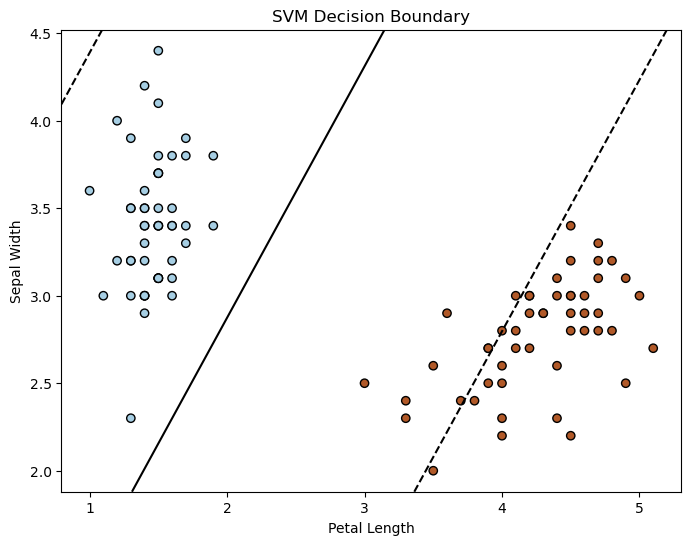

In [22]:
# Step 3: Preprocess the data
# Assign labels 0 and 1 for the first two classes (setosa and versicolor)
X = X[y != 2]
y = y[y != 2]
y[y == 0] = -1  # Convert labels to -1 and 1

# Step 4: Initialize SVM parameters
weights = np.zeros(X.shape[1])
learning_rate = 0.001
epochs = 1000

# Step 5: Train the SVM model
for epoch in range(epochs):
    for i, x in enumerate(X):
        if y[i] * np.dot(x, weights) <= 1:
            weights = weights + learning_rate * (y[i] * x - 2 * weights)

# Step 6: Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

plt.show()